In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Conda + Google colab v4


###Instalação Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:43
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
condacolab.install_anaconda()

✨🍰✨ Everything looks OK!


In [ ]:
!python --version

Python 3.7.10


## Preparação

### Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Muda o lugar de referencia e agora pode importar os arquivos .py dessa pasta no caminho
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I')
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd')


#### Informativo sobre sys.path

https://medium.com/analytics-vidhya/importing-your-own-python-module-or-python-file-into-colab-3e365f0a35ec

In [ ]:
help(sys.path.insert)

Help on built-in function insert:

insert(index, object, /) method of builtins.list instance
    Insert object before index.



#### Copy file from google drive to colab work diretory

In [ ]:
#!cd /content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/environment.yml
#cd entra na pasta #ls mostra o que tem dentro da pasta #pwd mostra qual é a pasta de trabalho atual

%%bash
ls
cd /content/drive/MyDrive/Colab\ Notebooks/Motion\ and\ Region\ A\ A\ L\ F\ D\ \ T\ I/
#ls /content/drive/MyDrive/
ls
pwd
cp environment.yml /content/

condacolab_install.log
drive
sample_data
dataset
environment.yml
LICENSE
mrfd
README.md
samples
/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I


### Instalação env.yml

In [ ]:
!conda env update -n base -f environment.yml

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
!conda info --envs

# conda environments:
#
base                  *  /usr/local



In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
!python --version

Python 3.7.6


In [ ]:
import cv2
cv2.__version__

'4.2.0'

In [ ]:
import tensorflow
tensorflow.__version__

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'1.14.0'

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# Person tracking and fall detection


config.py na pasta


```
root_drive ='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/dataset'
track_root_folder='Thermal_track'
root_folder='Thermal'
label_csv_path=root_drive+'/'+root_folder+'/Labels.csv'
adl_num=9
fall_num=35
#Tracking
detector_model_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/rfcn_resnet101_coco_2018_01_28'
#Dataset Image dimensions.
WIDTH=640
HEIGHT=480
#Dataset Image dimensions.
LOAD_DATA_SHAPE=(64,64,1)
#Window ceration parameters
WIN_LENGTH=8
SPLIT_GAP=10#Split a video if no person localization for a certain gap
STRIDE=1
BATCH_SIZE=32
flow_dir='./Optical_flow_h-{}_w-{}_win-{}_bw-{}'.format(LOAD_DATA_SHAPE[0],LOAD_DATA_SHAPE[1],WIN_LENGTH,SPLIT_GAP)

```



In [ ]:
from person_tracking import tracking_frames
from data_utils import *
import argparse
import config
from trainer.fusiondiffroigan import Params,Fusion_Diff_ROI_3DCAE_GAN3D
from models import diff_ROI_C3D_AE_no_pool


In [ ]:
#user input
detection_threshold=0.3
folder_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/dataset/Thermal/frame/Fall/Fall35'

In [ ]:
#parameters
WIDTH,HEIGHT=config.WIDTH,config.HEIGHT#original data specs
win_length=config.WIN_LENGTH
LOAD_DATA_SHAPE=config.LOAD_DATA_SHAPE
width, height,channels = LOAD_DATA_SHAPE[0],LOAD_DATA_SHAPE[1],LOAD_DATA_SHAPE[2]
break_win=config.SPLIT_GAP
stride=config.STRIDE


## Person tracking

In [ ]:
input_folder=folder_path
#reading and sorting image paths
frames_path = glob.glob(input_folder+'/*.jpg') + glob.glob(input_folder+'/*.png')
frames_path,numbers = sort_frames(frames_path,'Thermal')




sorting Thermal frames...


In [ ]:
#person tracking
boxes,track_numbers=tracking_frames(detection_threshold,frames_path,numbers,otsu_box=True)

 34%|███▍      | 274/804 [20:44<38:08,  4.32s/it]/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/person_tracking.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array([[z[0], 0, z[1], 0, z[2], 0, z[3], 0]]).T
100%|██████████| 804/804 [1:00:25<00:00,  4.51s/it]


In [ ]:

# box_path='box.npy'
# numbers_path='numbers.npy'
# if os.path.exists(box_path) and  os.path.exists(numbers_path):
#     boxes=np.load(box_path)
#     track_numbers=np.load(numbers_path)
# else:
#     np.save(box_path,boxes)
#     np.save(numbers_path,track_numbers)

In [ ]:
#preprocess boxes- remove -ve coordinates
boxes_proc=np.array([improve_box_cord(box,WIDTH,HEIGHT,offset=10) for box in boxes])
#creating dictionary with key:frame_num value:box with coordinates are scaled in range 0 to 1
boxes_fr=boxes_proc.copy()
boxes_fr=boxes_fr.astype('float64')
boxes_fr[:,0]=boxes_fr[:,0]/(1.0*HEIGHT)
boxes_fr[:,2]=boxes_fr[:,2]/(1.0*HEIGHT)
boxes_fr[:,1]=boxes_fr[:,1]/(1.0*WIDTH)
boxes_fr[:,3]=boxes_fr[:,3]/(1.0*WIDTH)
num_box_dict=dict(zip(track_numbers,boxes_fr))

##  Loading and Preprocessing thermal frames

In [ ]:


print("Thermal preprocessing....")
video={}

#preprocessing all frames
video["ALL_FRAME"],_,_=preprocess_frames(frames_path,numbers,process_list=['Processed'],ht=height,wd=width,channels=channels,ROI_array=None)

Thermal preprocessing....
data.shape (804, 64, 64, 1)


In [ ]:

tracked_frames_path=[]

for num in track_numbers:
    tracked_frames_path.append(frames_path[num-1])
#preprocessing tracked frames
#Data as numpy array and list of sorted frame numbers
data,frame_numbers,frames_path=preprocess_frames(tracked_frames_path,track_numbers,process_list=['Processed','ROI_frame'],ht=height,wd=width,channels=channels,ROI_array=boxes_proc)
#creating sub vidoes
data_list,frame_numbers_list=split_data_tracks(data,frame_numbers,gap=break_win,win_length=win_length)
#Split frames path
frames_path_list,_=split_data_tracks(frames_path,frame_numbers,gap=break_win,win_length=win_length)
video['ROI_FRAME']=data_list
video['NUMBER']=frame_numbers_list
video['PATH']=frames_path_list
print("\nCreating MASK data...........\n")
video['MASK']=create_ROI_mask(ROI_boxes=boxes_proc,ROI_numbers=track_numbers,img_shape=(config.HEIGHT,config.WIDTH,1),load_shape=config.LOAD_DATA_SHAPE,win_length=config.WIN_LENGTH,split_gap=config.SPLIT_GAP)
#optical flow computation

data.shape (530, 64, 64, 1)

Creating MASK data...........

ROI mask data shape (530, 64, 64, 1)


In [ ]:
#image sample
sub_video_num=0
index=10
frame_num=video['NUMBER'][sub_video_num][index]

In [ ]:
org_frame=video["ALL_FRAME"][frame_num-1]#1 numbering
roi_frame=video['ROI_FRAME'][sub_video_num][index]
mask=video['MASK'][sub_video_num][index]
box=num_box_dict[frame_num]

In [ ]:
def gray_color_image(gray):
    gray_scaled=np.expand_dims(cv2.normalize(gray,None,0,1,cv2.NORM_MINMAX),axis=-1)
    gray_scaled=gray_scaled*255
    gray_scaled=gray_scaled.astype(np.uint8)
    org_color=np.concatenate([gray_scaled,gray_scaled,gray_scaled],axis=-1)
    return org_color
def roi_gray_color_image(roi_gray,box_fr):
    height,width=roi_gray.shape[0],roi_gray.shape[1]
    color_img=np.zeros((height,width,3),dtype='uint8')
    left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
    color_img[top:bottom,left:right,:]=gray_color_image(roi_gray[top:bottom,left:right,:])
    return color_img
    
    

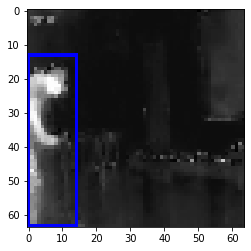

In [ ]:
left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
plt.imshow(cv2.rectangle(gray_color_image(org_frame), (left, top), (right, bottom), (0, 0, 255),1))

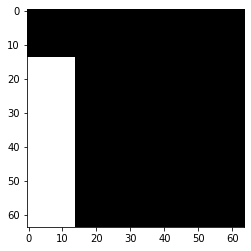

In [ ]:
plt.imshow(mask[:,:,0],cmap='gray')

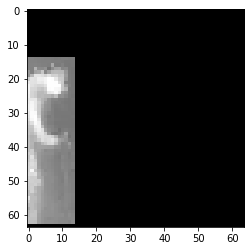

In [ ]:
plt.imshow(roi_gray_color_image(roi_frame,box))

## Thermal Windows Reconstruction

In [ ]:
from models import diff_ROI_C3D_AE_no_pool,ROI_C3D_AE_no_pool,Fusion_C3D_no_pool
from trainer.fusiondiffroigan import Params,Fusion_Diff_ROI_3DCAE_GAN3D
from trainer.util import agg_window,create_windowed_arr,get_output,gather_auc_avg_per_tol,join_mean_std,create_diff_mask

In [ ]:
#parameters
dset = config.track_root_folder
d_type='ROI_Fusion'
thermal_channels=1
flow_channels=3
regularizer_list = ['BN']
epochs_trained=299
lambdas=[1.0,1.0,1.0]#T_S,T_T,F
thermal_3dcae_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/Thermal_track/ROI_Fusion/ROI_C3DAE-no_pool-BN_diff_ROI_C3DAE_no_pool-BN_Fusion_C3D-no_pool-BN/lambda_TS1.0_TT1.0_F1.0/models/GAN_T_R_weights_epoch-299.h5'

In [ ]:
param=Params(width=width, height=height,win_length=win_length,thermal_channels=thermal_channels,flow_channels=flow_channels \
             ,dset=dset,d_type=d_type,regularizer_list=regularizer_list,break_win=break_win)
param.thermal_lambda_S=lambdas[0]
param.thermal_lambda_T=lambdas[1]
param.flow_lambda=lambdas[2]

In [ ]:
#trainer
GAN3D=Fusion_Diff_ROI_3DCAE_GAN3D(train_par=param,stride=stride)
#thermal reconstructor model 
#initialization
TR, TR_name, _ = diff_ROI_C3D_AE_no_pool(img_width=param.width, img_height=param.height, win_length=param.win_length, regularizer_list=param.regularizer_list,channels=param.thermal_channels,lambda_S=param.thermal_lambda_S,lambda_T=param.thermal_lambda_T,d_type='thermal')


In [ ]:
#Loading weights
if os.path.isfile(thermal_3dcae_path):
    TR.load_weights(thermal_3dcae_path)
    GAN3D.T_R=TR
    print("Model weights loaded successfully........")
else:
    print("Saved model weights not found......")

Model weights loaded successfully........


#### Sliding window

In [ ]:
vid_thermal_list=video['ROI_FRAME']
vid_thermal_mask_list=video['MASK']
frame_numbers_cat=np.concatenate(video['NUMBER'])

In [ ]:
#creating windows of thermal frames for each subvideo separately
thermal_data_list = [vid.reshape(len(vid), param.width,param.height, param.thermal_channels) for vid in vid_thermal_list]
thermal_data_windowed_list = [create_windowed_arr(test_data, stride, param.win_length) for test_data in thermal_data_list]#create_windowe

In [ ]:
# creating windows of mask data
thermal_mask_list = [vid.reshape(len(vid), param.width,param.height, param.thermal_channels) for vid in vid_thermal_mask_list]

thermal_mask_windowed_list = [create_windowed_arr(test_data, stride, param.win_length).astype('int8') for test_data in thermal_mask_list]
# creating windows of mask of difference frames
diff_mask_windowed_list=[create_diff_mask(mask_windows) for mask_windows in thermal_mask_windowed_list]

In [ ]:
num_sub_videos=len(thermal_data_windowed_list)

### Model prediction, frame level anomaly scores and thermal reconstruction

In [ ]:
def get_cross_window_frames(recons_seq,height,width,channels,win_length):
    '''
        Take mean of the reconstructed frames present in different windows corresponding to the actual frame timestamp
    '''
    seq_num=recons_seq.shape[0]+win_length-1
    sum_frames=np.zeros((seq_num,height,width,channels),dtype='float')
    count_frames=np.zeros((seq_num))
    for i in range(recons_seq.shape[0]):
        sum_frames[i:i+win_length,:]+=recons_seq[i,:]
        count_frames[i:i+win_length]+=1
    return sum_frames/count_frames[:, np.newaxis, np.newaxis, np.newaxis]

In [ ]:
#frame based anomaly scores
x_std_RE=[]
x_mean_RE=[]
mean_frames=[]
for index in range(num_sub_videos):
    test_data_masked_windowed=thermal_data_windowed_list[index]
    test_mask_windowed=thermal_mask_windowed_list[index]
    test_diff_mask_windowed=diff_mask_windowed_list[index]

    RE_dict, recons_seq = GAN3D.get_T_S_RE_all_agg(thermal_data=test_data_masked_windowed,thermal_masks=test_mask_windowed,diff_masks=test_diff_mask_windowed) #Return dict with value for each score style
    x_std_RE.append(RE_dict['x_std'])
    x_mean_RE.append(RE_dict['x_mean'])
    mean_recons_seq=get_cross_window_frames(recons_seq,param.height,param.width, param.thermal_channels,param.win_length)
    mean_frames.append(mean_recons_seq)
  
x_std_RE=np.concatenate(x_std_RE)
x_mean_RE=np.concatenate(x_mean_RE)
mean_frames=np.concatenate(mean_frames)

In [ ]:
print(mean_frames.shape)
print(len(frame_numbers_cat))

(530, 64, 64, 1)
530


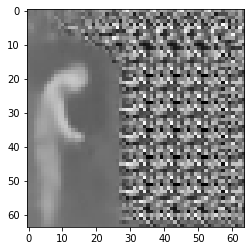

In [ ]:
plt.imshow(mean_frames[50,:,:,0],cmap='gray')

### Anomaly score plot

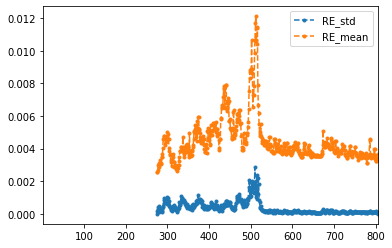

In [ ]:

plt.plot(frame_numbers_cat,x_std_RE, label='RE_std',linestyle='--', marker='.')
plt.plot(frame_numbers_cat,x_mean_RE, label='RE_mean',linestyle='--', marker='.')
# plt.xticks([i+1 for i in range(max(frame_numbers))])
plt.xlim(1,max(frame_numbers_cat))
# plt.ylim(0,1)
plt.legend()
# plt.axvspan(start,end, alpha = 0.5)
plt.show()

## Create Animation

In [ ]:
#dictionary tracked frames number to index
indices=list(range(len(frame_numbers_cat)))
track_indices=dict(zip(frame_numbers_cat,indices))

In [ ]:
#convert gray to rgb, add boxes to track frames
actual_frames=video["ALL_FRAME"]
org_color_images=[]
recon_color_images=[]
for i in range(len(actual_frames)):
    if i+1 in track_indices:
        box=num_box_dict[i+1]
        left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
        #add box in org frame
        clr_img=cv2.rectangle(gray_color_image(actual_frames[i]), (left, top), (right, bottom), (0, 0, 255),1)
        org_color_images.append(clr_img)
        #recons image -> color img
        recon_im=gray_color_image(mean_frames[track_indices[i+1]])
        clr_img=cv2.rectangle(recon_im, (left, top), (right, bottom), (0, 0, 255),1)
        recon_color_images.append(clr_img)
    else:
        org_color_images.append(gray_color_image(actual_frames[i]))
        recon_color_images.append(np.zeros((height,width,3),dtype='uint8'))


In [ ]:
print(len(org_color_images))
print(len(recon_color_images))

804
804


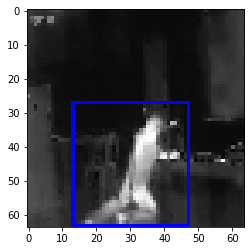

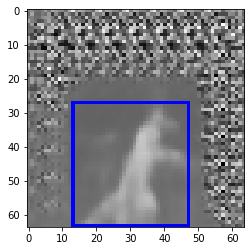

In [ ]:
index=500
plt.imshow(org_color_images[index])
plt.show()
plt.imshow(recon_color_images[index])
plt.show()

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
'''
This function is the extension of function animate_fall_detect_Spresen() from https://github.com/JJN123/Fall-Detection/blob/master/util.py

'''
def animate_fall_detect_animation(actual_frames, recons,recons_timestamp, scores,score_type='RE_mean',threshold = 0,to_save = './test.mp4'):
    '''
    Create animation from actual frames, reconstructed frames and frame level anomaly score with timestamps
    '''
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(2,2,height_ratios = [2,1])
    
    ht, wd = 64,64

    eps = .0001
    #setup figure
    #fig = plt.figure()
    fig, ((ax1,ax3)) = plt.subplots(1,2,figsize = (6,6))

    ax1.axis('off')
    ax3.axis('off')
    #ax1=fig.add_subplot(2,2,1)

    ax1=fig.add_subplot(gs[0,0])
    ax1.set_title("Original")
    ax1.set_xticks([])
    ax1.set_yticks([])


    #ax2=fig.add_subplot(gs[-1,0])
    ax2=fig.add_subplot(gs[1,:])

    #ax2.set_yticks([])
    #ax2.set_xticks([])
    ax2.set_ylabel('Score')
    ax2.set_xlabel('Frame')
    ax2.set_xlim([1, len(actual_frames)])
    if threshold != 0:
        ax2.axhline(y= threshold, color='r', linestyle='dashed', label = 'RRE')
        ax2.legend()

    #ax3=fig.add_subplot(2,2,2)
    ax3=fig.add_subplot(gs[0,1])
    ax3.set_title("Reconstruction")
    ax3.set_xticks([])
    ax3.set_yticks([])

    #dictionary to frame number to indices
    indices=list(range(len(recons_timestamp)))
    track_indices=dict(zip(recons_timestamp,indices))
    #set up list of images for animation
    ims=[]
    track_ind=None
    for time in tqdm(range(len(actual_frames))):
        #plot images
        im1 = ax1.imshow(actual_frames[time])
        figure= recons[time]
        im2 = ax3.imshow(figure, cmap = 'gray', aspect = 'equal')
        
        if time+1 in track_indices:
            track_ind=track_indices[time+1]
            
        if track_ind is not None:
            scores_curr = scores[:track_ind+1]
            track_num=recons_timestamp[:track_ind+1]
            
            plot, = ax2.plot(track_num, scores_curr,'b.',linestyle='--', marker='.',label=score_type)
        else:
            plot, = ax2.plot([],'b.')
#             plot_r, = ax2.plot([],'b.')
            
            
    

        ims.append([im1, plot, im2]) #list of ims

    #run animation
    ani = animation.ArtistAnimation(fig,ims, interval= 30, repeat=False)
    
    ani.save(to_save)

    ani.event_source.stop()
    del ani
    plt.close()
#     plt.show()

In [ ]:
demo_samples_path='demo_samples'
os.makedirs(demo_samples_path,exist_ok=True)

In [ ]:
#user_input
score_type='mean'
video_name='Fall35'
save_path=demo_samples_path+'/'+video_name+'_'+score_type+'.mp4'

In [ ]:
animate_fall_detect_animation(org_color_images,recon_color_images,frame_numbers_cat, scores=x_mean_RE,score_type='RE_'+score_type,to_save = save_path)

100%|██████████| 804/804 [00:02<00:00, 327.57it/s]


# Trabalhando novo video

## FMT e grayscale



In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

VIDEO_SOURCE = '/content/gdrive/MyDrive/Colab Notebooks/Allan Fall/20210929_122032.mp4'
#VIDEO_OUT = 'FMT.avi'

cap = cv2.VideoCapture(VIDEO_SOURCE)

In [ ]:
print('contagem de todos os frames do video')
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#print('gera 25 numeros aleatorios')
#print(np.random.uniform(size=25))

print('seleciona 25 frames aleatorios do video')
framesIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=25)
#print(framesIds)

contagem de todos os frames do video
738.0
seleciona 25 frames aleatorios do video


In [ ]:
#armazena os 25 frames em um array
frames = []
for fid in framesIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    hasFrame, frame = cap.read()
    frames.append(frame)

print('numero de frames')
print(np.asarray(frames).shape)
#print('exemplos')
#print(frames[0])
#print(frames[1])

numero de frames
(25, 1080, 1920, 3)


In [ ]:
#calculo da mediana de cada uma das imagens considerando todos os pixels (por causa do axis=0, vai por linha)
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
#print('imprime o primeiro frame de exemplo')
#print(frame[0])
#print('imprime a imagem de plano de fundo em forma de matriz')
#print(medianFrame)
print('imprime a imagem de plano de fundo')
cv2_imshow(medianFrame)

#cv2.imwrite('model_median_frame.jpg', medianFrame)

#print('converte para cinza')
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
#cv2_imshow(grayMedianFrame)

In [ ]:
#demo_samples_path='frames'
#os.makedirs(demo_samples_path,exist_ok=True)

In [ ]:
#user_input
#score_type='mean'
#video_name='Fall35'
#save_path=demo_samples_path+'/'+video_name+'_'+score_type+'.mp4'

#/content/gdrive/MyDrive/Colab Notebooks/Allan Fall/frames

Salvar arquivo na nuvem

https://stackoverflow.com/questions/64808087/how-do-i-save-files-from-google-colab-to-google-drive

In [ ]:
i=0
while (True):
    hasFrame, frame = cap.read()

    if not hasFrame:
        print('Error')
        break
    i+=1
    #redimenciona
    frame = cv2.resize(frame, (0, 0), fx=0.33333333, fy=0.44444444)

    #converte para cinza
    frameGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #faz a diferença do frame com o fundo
    #dframe = cv2.absdiff(frameGray, grayMedianFrame)

    #redimenciona
    #dframe = cv2.resize(dframe, (0, 0), fx=0.40, fy=0.40)

    #threashold para ajustar e tirar o ruido 
    #th, dframe = cv2.threshold(dframe, 70, 255, cv2.THRESH_BINARY)
    #th, dframe = cv2.threshold(dframe, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    #print(th)

    #mostra o frame resultante
    #cv2_imshow(frameGray)

    #guarda o frame resultante
    #writer.write(dframe)
    
    i = str(i).zfill(4)
    #salva o frame no meu google drive
    cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/Allan Fall/Fall36/FALL_36-'+ i +'.jpg', frameGray)
    i = int(i)

#writer.release()
cap.release()

print('fim')


Error
fim


## ["GMG", "MOG", "MOG2", "KNN", "CNT"]

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import cv2
import sys

from google.colab.patches import cv2_imshow

TEXT_COLOR = (0, 255, 0)
TRACKER_COLOR = (255, 0, 0)
FONT = cv2.FONT_HERSHEY_SIMPLEX
VIDEO_SOURCE = "/content/gdrive/MyDrive/Colab Notebooks/Allan Fall/Youtube/TENTE NÃO RIR _ MELHORES TOMBOS DE BÊBADO.mp4"

BGS_TYPES = ["GMG", "MOG", "MOG2", "KNN", "CNT"]
BGS_TYPE = BGS_TYPES[2]

def getKernel(KERNEL_TYPE):
    if KERNEL_TYPE == "dilation":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    if KERNEL_TYPE == "opening":
        kernel = np.ones((3, 3), np.uint8)
    if KERNEL_TYPE == "closing":
        kernel = np.ones((3, 3), np.uint8)

    return kernel

def getFilter(img, filter):
    if filter == 'closing':
        return cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel("closing"), iterations=2)

    if filter == 'opening':
        return cv2.morphologyEx(img, cv2.MORPH_OPEN, getKernel("opening"), iterations=2)

    if filter == 'dilation':
        return cv2.dilate(img, getKernel("dilation"), iterations=2)

    if filter == 'combine':
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel("closing"), iterations=2)
        opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, getKernel("opening"), iterations=2)
        dilation = cv2.dilate(opening, getKernel("dilation"), iterations=2)

        return dilation

def getBGSubtractor(BGS_TYPE):
    if BGS_TYPE == "GMG":
        return cv2.bgsegm.createBackgroundSubtractorGMG()
    if BGS_TYPE == "MOG":
        return cv2.bgsegm.createBackgroundSubtractorMOG()
    if BGS_TYPE == "MOG2":
        return cv2.createBackgroundSubtractorMOG2()
    if BGS_TYPE == "KNN":
        return cv2.createBackgroundSubtractorKNN()
    if BGS_TYPE == "CNT":
        return cv2.bgsegm.createBackgroundSubtractorCNT()
    print("Detector invalido")
    sys.exit(1)

cap = cv2.VideoCapture(VIDEO_SOURCE)
minArea = 250
bg_subtractor = getBGSubtractor(BGS_TYPE)


def main(i):
    while (cap.isOpened):

        ok, frame = cap.read()
        if not ok:
            print("Erro")
            break
        i+=1
        

        frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.6722689076)
        #frame no dataset: 640x480
        #frame atual:1920x1080
        #1920x0,333333= 640 e 1080x0,444444=480

        #962x714
        #640/962 = 0,9771309771
        #480/714 = 0,6722689076

        #1280x720
        #640/1280 = 0.5
        #480/720 = 0.666666666667

        #converte para cinza
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #bg_mask = bg_subtractor.apply(frame)
        #bg_mask = getFilter(bg_mask, 'combine')
        #bg_mask = cv2.medianBlur(bg_mask, 5)


        #result = cv2.bitwise_and(frame, frame, mask=bg_mask)
        #cv2_imshow(bg_mask)
        #cv2_imshow(result)
        #cv2.imwrite('frame' + i +'.jpg', medianFrame)

        i = str(i).zfill(4)
        #salva o frame no meu google drive
        cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/Allan Fall/Fall37/FALL_37-'+ i +'.jpg', frame)
        i = int(i)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cap.release()
    #cv2.destroyAllWindonws()
    

main(0)

#contornos caso necessario
'''
        (contours, hierarchy) = cv2.findContours(bg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #print(contours)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area >= minArea:
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(frame, (10,30), (250,55), (255,0,0), -1)
                cv2.putText(frame, 'Movimento detectado!', (10,50), FONT, 0.8, TEXT_COLOR, 2, cv2.LINE_AA)

                cv2.drawContours(frame, cnt, -1, TRACKER_COLOR, 3)
                cv2.drawContours(frame, cnt, -1, (255,255,255), 1)
                cv2.rectangle(frame, (x, y), (x+w, y+h), TRACKER_COLOR, 3)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 1)

                # SobreposiÃ§Ãµes transparentes
                # https://www.pyimagesearch.com/2016/03/07/transparent-overlays-with-opencv/
                #for alpha in np.arange(0.8, 1.1, 0.9)[::-1]:
                #    frame_copy = frame.copy()
                #    output = frame.copy()
                #    cv2.drawContours(frame_copy, [cnt], -1, TRACKER_COLOR, -1)
                #    frame = cv2.addWeighted(frame_copy, alpha, output, 1 - alpha, 0, output)
'''
print('fim')

Erro
fim


# Person tracking and fall detection modificado


config.py na pasta


```
root_drive ='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/dataset'
track_root_folder='Thermal_track'
root_folder='Thermal'
label_csv_path=root_drive+'/'+root_folder+'/Labels.csv'
adl_num=9
fall_num=35
#Tracking
detector_model_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/rfcn_resnet101_coco_2018_01_28'
#Dataset Image dimensions.
WIDTH=640
HEIGHT=480
#Dataset Image dimensions.
LOAD_DATA_SHAPE=(64,64,1)
#Window ceration parameters
WIN_LENGTH=8
SPLIT_GAP=10#Split a video if no person localization for a certain gap
STRIDE=1
BATCH_SIZE=32
flow_dir='./Optical_flow_h-{}_w-{}_win-{}_bw-{}'.format(LOAD_DATA_SHAPE[0],LOAD_DATA_SHAPE[1],WIN_LENGTH,SPLIT_GAP)

```



In [ ]:
from person_tracking import tracking_frames
from data_utils import *
import argparse
import config
from trainer.fusiondiffroigan import Params,Fusion_Diff_ROI_3DCAE_GAN3D
from models import diff_ROI_C3D_AE_no_pool


In [ ]:
#user input
detection_threshold=0.3
folder_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/dataset/Thermal/frame/Fall/Fall36'

In [ ]:
#parameters
WIDTH,HEIGHT=config.WIDTH,config.HEIGHT#original data specs
win_length=config.WIN_LENGTH
LOAD_DATA_SHAPE=config.LOAD_DATA_SHAPE
width, height,channels = LOAD_DATA_SHAPE[0],LOAD_DATA_SHAPE[1],LOAD_DATA_SHAPE[2]
break_win=config.SPLIT_GAP
stride=config.STRIDE


## Person tracking

In [ ]:
input_folder=folder_path
#reading and sorting image paths
frames_path = glob.glob(input_folder+'/*.jpg') + glob.glob(input_folder+'/*.png')
frames_path,numbers = sort_frames(frames_path,'Thermal')




sorting Thermal frames...


In [ ]:
#person tracking
boxes,track_numbers=tracking_frames(detection_threshold,frames_path,numbers,otsu_box=True)

 28%|██▊       | 18/64 [00:31<00:50,  1.09s/it]/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/person_tracking.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array([[z[0], 0, z[1], 0, z[2], 0, z[3], 0]]).T
100%|██████████| 64/64 [00:59<00:00,  1.08it/s]


In [ ]:

# box_path='box.npy'
# numbers_path='numbers.npy'
# if os.path.exists(box_path) and  os.path.exists(numbers_path):
#     boxes=np.load(box_path)
#     track_numbers=np.load(numbers_path)
# else:
#     np.save(box_path,boxes)
#     np.save(numbers_path,track_numbers)

In [ ]:
#preprocess boxes- remove -ve coordinates
boxes_proc=np.array([improve_box_cord(box,WIDTH,HEIGHT,offset=10) for box in boxes])
#creating dictionary with key:frame_num value:box with coordinates are scaled in range 0 to 1
boxes_fr=boxes_proc.copy()
boxes_fr=boxes_fr.astype('float64')
boxes_fr[:,0]=boxes_fr[:,0]/(1.0*HEIGHT)
boxes_fr[:,2]=boxes_fr[:,2]/(1.0*HEIGHT)
boxes_fr[:,1]=boxes_fr[:,1]/(1.0*WIDTH)
boxes_fr[:,3]=boxes_fr[:,3]/(1.0*WIDTH)
num_box_dict=dict(zip(track_numbers,boxes_fr))

##  Loading and Preprocessing thermal frames

In [ ]:


print("Thermal preprocessing....")
video={}

#preprocessing all frames
video["ALL_FRAME"],_,_=preprocess_frames(frames_path,numbers,process_list=['Processed'],ht=height,wd=width,channels=channels,ROI_array=None)

Thermal preprocessing....
data.shape (64, 64, 64, 1)


In [ ]:

tracked_frames_path=[]

for num in track_numbers:
    tracked_frames_path.append(frames_path[num-1])
#preprocessing tracked frames
#Data as numpy array and list of sorted frame numbers
data,frame_numbers,frames_path=preprocess_frames(tracked_frames_path,track_numbers,process_list=['Processed','ROI_frame'],ht=height,wd=width,channels=channels,ROI_array=boxes_proc)
#creating sub vidoes
data_list,frame_numbers_list=split_data_tracks(data,frame_numbers,gap=break_win,win_length=win_length)
#Split frames path
frames_path_list,_=split_data_tracks(frames_path,frame_numbers,gap=break_win,win_length=win_length)
video['ROI_FRAME']=data_list
video['NUMBER']=frame_numbers_list
video['PATH']=frames_path_list
print("\nCreating MASK data...........\n")
video['MASK']=create_ROI_mask(ROI_boxes=boxes_proc,ROI_numbers=track_numbers,img_shape=(config.HEIGHT,config.WIDTH,1),load_shape=config.LOAD_DATA_SHAPE,win_length=config.WIN_LENGTH,split_gap=config.SPLIT_GAP)
#optical flow computation

data.shape (10, 64, 64, 1)

Creating MASK data...........

ROI mask data shape (10, 64, 64, 1)


In [ ]:
#image sample
sub_video_num=0
index=10
frame_num=video['NUMBER'][sub_video_num][index]

IndexError: ignored

In [ ]:
org_frame=video["ALL_FRAME"][frame_num-1]#1 numbering
roi_frame=video['ROI_FRAME'][sub_video_num][index]
mask=video['MASK'][sub_video_num][index]
box=num_box_dict[frame_num]

IndexError: ignored

In [ ]:
def gray_color_image(gray):
    gray_scaled=np.expand_dims(cv2.normalize(gray,None,0,1,cv2.NORM_MINMAX),axis=-1)
    gray_scaled=gray_scaled*255
    gray_scaled=gray_scaled.astype(np.uint8)
    org_color=np.concatenate([gray_scaled,gray_scaled,gray_scaled],axis=-1)
    return org_color
def roi_gray_color_image(roi_gray,box_fr):
    height,width=roi_gray.shape[0],roi_gray.shape[1]
    color_img=np.zeros((height,width,3),dtype='uint8')
    left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
    color_img[top:bottom,left:right,:]=gray_color_image(roi_gray[top:bottom,left:right,:])
    return color_img
    
    

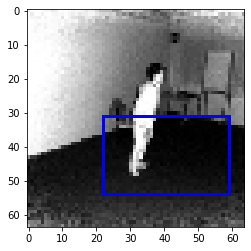

In [ ]:
left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
plt.imshow(cv2.rectangle(gray_color_image(org_frame), (left, top), (right, bottom), (0, 0, 255),1))

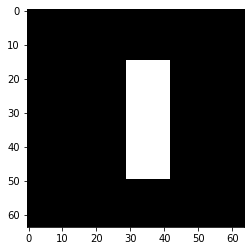

In [ ]:
plt.imshow(mask[:,:,0],cmap='gray')

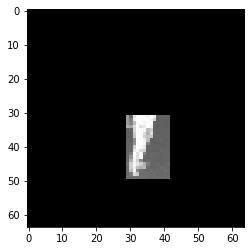

In [ ]:
plt.imshow(roi_gray_color_image(roi_frame,box))

## Thermal Windows Reconstruction

In [ ]:
from models import diff_ROI_C3D_AE_no_pool,ROI_C3D_AE_no_pool,Fusion_C3D_no_pool
from trainer.fusiondiffroigan import Params,Fusion_Diff_ROI_3DCAE_GAN3D
from trainer.util import agg_window,create_windowed_arr,get_output,gather_auc_avg_per_tol,join_mean_std,create_diff_mask

In [ ]:
#parameters
dset = config.track_root_folder
d_type='ROI_Fusion'
thermal_channels=1
flow_channels=3
regularizer_list = ['BN']
epochs_trained=299
lambdas=[1.0,1.0,1.0]#T_S,T_T,F
thermal_3dcae_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/Thermal_track/ROI_Fusion/ROI_C3DAE-no_pool-BN_diff_ROI_C3DAE_no_pool-BN_Fusion_C3D-no_pool-BN/lambda_TS1.0_TT1.0_F1.0/models/GAN_T_R_weights_epoch-299.h5'

In [ ]:
param=Params(width=width, height=height,win_length=win_length,thermal_channels=thermal_channels,flow_channels=flow_channels \
             ,dset=dset,d_type=d_type,regularizer_list=regularizer_list,break_win=break_win)
param.thermal_lambda_S=lambdas[0]
param.thermal_lambda_T=lambdas[1]
param.flow_lambda=lambdas[2]

In [ ]:
#trainer
GAN3D=Fusion_Diff_ROI_3DCAE_GAN3D(train_par=param,stride=stride)
#thermal reconstructor model 
#initialization
TR, TR_name, _ = diff_ROI_C3D_AE_no_pool(img_width=param.width, img_height=param.height, win_length=param.win_length, regularizer_list=param.regularizer_list,channels=param.thermal_channels,lambda_S=param.thermal_lambda_S,lambda_T=param.thermal_lambda_T,d_type='thermal')


In [ ]:
#Loading weights
if os.path.isfile(thermal_3dcae_path):
    TR.load_weights(thermal_3dcae_path)
    GAN3D.T_R=TR
    print("Model weights loaded successfully........")
else:
    print("Saved model weights not found......")

Model weights loaded successfully........


#### Sliding window

In [ ]:
vid_thermal_list=video['ROI_FRAME']
vid_thermal_mask_list=video['MASK']
frame_numbers_cat=np.concatenate(video['NUMBER'])

In [ ]:
#creating windows of thermal frames for each subvideo separately
thermal_data_list = [vid.reshape(len(vid), param.width,param.height, param.thermal_channels) for vid in vid_thermal_list]
thermal_data_windowed_list = [create_windowed_arr(test_data, stride, param.win_length) for test_data in thermal_data_list]#create_windowe

In [ ]:
# creating windows of mask data
thermal_mask_list = [vid.reshape(len(vid), param.width,param.height, param.thermal_channels) for vid in vid_thermal_mask_list]

thermal_mask_windowed_list = [create_windowed_arr(test_data, stride, param.win_length).astype('int8') for test_data in thermal_mask_list]
# creating windows of mask of difference frames
diff_mask_windowed_list=[create_diff_mask(mask_windows) for mask_windows in thermal_mask_windowed_list]

In [ ]:
num_sub_videos=len(thermal_data_windowed_list)

### Model prediction, frame level anomaly scores and thermal reconstruction

In [ ]:
def get_cross_window_frames(recons_seq,height,width,channels,win_length):
    '''
        Take mean of the reconstructed frames present in different windows corresponding to the actual frame timestamp
    '''
    seq_num=recons_seq.shape[0]+win_length-1
    sum_frames=np.zeros((seq_num,height,width,channels),dtype='float')
    count_frames=np.zeros((seq_num))
    for i in range(recons_seq.shape[0]):
        sum_frames[i:i+win_length,:]+=recons_seq[i,:]
        count_frames[i:i+win_length]+=1
    return sum_frames/count_frames[:, np.newaxis, np.newaxis, np.newaxis]

In [ ]:
#frame based anomaly scores
x_std_RE=[]
x_mean_RE=[]
mean_frames=[]
for index in range(num_sub_videos):
    test_data_masked_windowed=thermal_data_windowed_list[index]
    test_mask_windowed=thermal_mask_windowed_list[index]
    test_diff_mask_windowed=diff_mask_windowed_list[index]

    RE_dict, recons_seq = GAN3D.get_T_S_RE_all_agg(thermal_data=test_data_masked_windowed,thermal_masks=test_mask_windowed,diff_masks=test_diff_mask_windowed) #Return dict with value for each score style
    x_std_RE.append(RE_dict['x_std'])
    x_mean_RE.append(RE_dict['x_mean'])
    mean_recons_seq=get_cross_window_frames(recons_seq,param.height,param.width, param.thermal_channels,param.win_length)
    mean_frames.append(mean_recons_seq)
  
x_std_RE=np.concatenate(x_std_RE)
x_mean_RE=np.concatenate(x_mean_RE)
mean_frames=np.concatenate(mean_frames)

In [ ]:
print(mean_frames.shape)
print(len(frame_numbers_cat))

(75, 64, 64, 1)
75


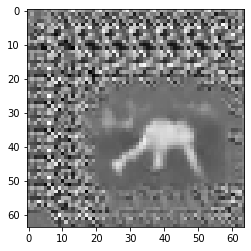

In [ ]:
plt.imshow(mean_frames[50,:,:,0],cmap='gray')

### Anomaly score plot

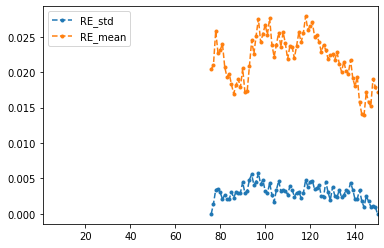

In [ ]:

plt.plot(frame_numbers_cat,x_std_RE, label='RE_std',linestyle='--', marker='.')
plt.plot(frame_numbers_cat,x_mean_RE, label='RE_mean',linestyle='--', marker='.')
# plt.xticks([i+1 for i in range(max(frame_numbers))])
plt.xlim(1,max(frame_numbers_cat))
# plt.ylim(0,1)
plt.legend()
# plt.axvspan(start,end, alpha = 0.5)
plt.show()

## Create Animation

In [ ]:
#dictionary tracked frames number to index
indices=list(range(len(frame_numbers_cat)))
track_indices=dict(zip(frame_numbers_cat,indices))

In [ ]:
#convert gray to rgb, add boxes to track frames
actual_frames=video["ALL_FRAME"]
org_color_images=[]
recon_color_images=[]
for i in range(len(actual_frames)):
    if i+1 in track_indices:
        box=num_box_dict[i+1]
        left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
        #add box in org frame
        clr_img=cv2.rectangle(gray_color_image(actual_frames[i]), (left, top), (right, bottom), (0, 0, 255),1)
        org_color_images.append(clr_img)
        #recons image -> color img
        recon_im=gray_color_image(mean_frames[track_indices[i+1]])
        clr_img=cv2.rectangle(recon_im, (left, top), (right, bottom), (0, 0, 255),1)
        recon_color_images.append(clr_img)
    else:
        org_color_images.append(gray_color_image(actual_frames[i]))
        recon_color_images.append(np.zeros((height,width,3),dtype='uint8'))


In [ ]:
print(len(org_color_images))
print(len(recon_color_images))

264
264


In [ ]:
index=500
plt.imshow(org_color_images[index])
plt.show()
plt.imshow(recon_color_images[index])
plt.show()

IndexError: ignored

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
'''
This function is the extension of function animate_fall_detect_Spresen() from https://github.com/JJN123/Fall-Detection/blob/master/util.py

'''
def animate_fall_detect_animation(actual_frames, recons,recons_timestamp, scores,score_type='RE_mean',threshold = 0,to_save = './test.mp4'):
    '''
    Create animation from actual frames, reconstructed frames and frame level anomaly score with timestamps
    '''
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(2,2,height_ratios = [2,1])
    
    ht, wd = 64,64

    eps = .0001
    #setup figure
    #fig = plt.figure()
    fig, ((ax1,ax3)) = plt.subplots(1,2,figsize = (6,6))

    ax1.axis('off')
    ax3.axis('off')
    #ax1=fig.add_subplot(2,2,1)

    ax1=fig.add_subplot(gs[0,0])
    ax1.set_title("Original")
    ax1.set_xticks([])
    ax1.set_yticks([])


    #ax2=fig.add_subplot(gs[-1,0])
    ax2=fig.add_subplot(gs[1,:])

    #ax2.set_yticks([])
    #ax2.set_xticks([])
    ax2.set_ylabel('Score')
    ax2.set_xlabel('Frame')
    ax2.set_xlim([1, len(actual_frames)])
    if threshold != 0:
        ax2.axhline(y= threshold, color='r', linestyle='dashed', label = 'RRE')
        ax2.legend()

    #ax3=fig.add_subplot(2,2,2)
    ax3=fig.add_subplot(gs[0,1])
    ax3.set_title("Reconstruction")
    ax3.set_xticks([])
    ax3.set_yticks([])

    #dictionary to frame number to indices
    indices=list(range(len(recons_timestamp)))
    track_indices=dict(zip(recons_timestamp,indices))
    #set up list of images for animation
    ims=[]
    track_ind=None
    for time in tqdm(range(len(actual_frames))):
        #plot images
        im1 = ax1.imshow(actual_frames[time])
        figure= recons[time]
        im2 = ax3.imshow(figure, cmap = 'gray', aspect = 'equal')
        
        if time+1 in track_indices:
            track_ind=track_indices[time+1]
            
        if track_ind is not None:
            scores_curr = scores[:track_ind+1]
            track_num=recons_timestamp[:track_ind+1]
            
            plot, = ax2.plot(track_num, scores_curr,'b.',linestyle='--', marker='.',label=score_type)
        else:
            plot, = ax2.plot([],'b.')
#             plot_r, = ax2.plot([],'b.')
            
            
    

        ims.append([im1, plot, im2]) #list of ims

    #run animation
    ani = animation.ArtistAnimation(fig,ims, interval= 30, repeat=False)
    
    ani.save(to_save)

    ani.event_source.stop()
    del ani
    plt.close()
#     plt.show()

In [ ]:
demo_samples_path='demo_samples'
os.makedirs(demo_samples_path,exist_ok=True)

In [ ]:
#user_input
score_type='mean'
video_name='Fall35'
save_path=demo_samples_path+'/'+video_name+'_'+score_type+'.mp4'

In [ ]:
animate_fall_detect_animation(org_color_images,recon_color_images,frame_numbers_cat, scores=x_mean_RE,score_type='RE_'+score_type,to_save = save_path)

100%|██████████| 264/264 [00:00<00:00, 358.77it/s]


# Person tracking and fall detection modificado 2

config.py na pasta


```
root_drive ='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/dataset'
track_root_folder='Thermal_track'
root_folder='Thermal'
label_csv_path=root_drive+'/'+root_folder+'/Labels.csv'
adl_num=9
fall_num=35
#Tracking
detector_model_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/rfcn_resnet101_coco_2018_01_28'
#Dataset Image dimensions.
WIDTH=640
HEIGHT=480
#Dataset Image dimensions.
LOAD_DATA_SHAPE=(64,64,1)
#Window ceration parameters
WIN_LENGTH=8
SPLIT_GAP=10#Split a video if no person localization for a certain gap
STRIDE=1
BATCH_SIZE=32
flow_dir='./Optical_flow_h-{}_w-{}_win-{}_bw-{}'.format(LOAD_DATA_SHAPE[0],LOAD_DATA_SHAPE[1],WIN_LENGTH,SPLIT_GAP)

```



In [ ]:
from person_tracking import tracking_frames
from data_utils import *
import argparse
import config
from trainer.fusiondiffroigan import Params,Fusion_Diff_ROI_3DCAE_GAN3D
from models import diff_ROI_C3D_AE_no_pool


In [ ]:
#user input
detection_threshold=0.3
folder_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/dataset/Thermal/frame/Fall/Fall37'

In [ ]:
#parameters
WIDTH,HEIGHT=config.WIDTH,config.HEIGHT#original data specs
win_length=config.WIN_LENGTH
LOAD_DATA_SHAPE=config.LOAD_DATA_SHAPE
width, height,channels = LOAD_DATA_SHAPE[0],LOAD_DATA_SHAPE[1],LOAD_DATA_SHAPE[2]
break_win=config.SPLIT_GAP
stride=config.STRIDE


## Person tracking

In [ ]:
input_folder=folder_path
#reading and sorting image paths
frames_path = glob.glob(input_folder+'/*.jpg') + glob.glob(input_folder+'/*.png')
frames_path,numbers = sort_frames(frames_path,'Thermal')




sorting Thermal frames...


In [ ]:
#person tracking
boxes,track_numbers=tracking_frames(detection_threshold,frames_path,numbers,otsu_box=True)

 74%|███████▎  | 256/348 [04:54<01:28,  1.03it/s]

In [ ]:

# box_path='box.npy'
# numbers_path='numbers.npy'
# if os.path.exists(box_path) and  os.path.exists(numbers_path):
#     boxes=np.load(box_path)
#     track_numbers=np.load(numbers_path)
# else:
#     np.save(box_path,boxes)
#     np.save(numbers_path,track_numbers)

In [ ]:
#preprocess boxes- remove -ve coordinates
boxes_proc=np.array([improve_box_cord(box,WIDTH,HEIGHT,offset=10) for box in boxes])
#creating dictionary with key:frame_num value:box with coordinates are scaled in range 0 to 1
boxes_fr=boxes_proc.copy()
boxes_fr=boxes_fr.astype('float64')
boxes_fr[:,0]=boxes_fr[:,0]/(1.0*HEIGHT)
boxes_fr[:,2]=boxes_fr[:,2]/(1.0*HEIGHT)
boxes_fr[:,1]=boxes_fr[:,1]/(1.0*WIDTH)
boxes_fr[:,3]=boxes_fr[:,3]/(1.0*WIDTH)
num_box_dict=dict(zip(track_numbers,boxes_fr))

##  Loading and Preprocessing thermal frames

In [ ]:


print("Thermal preprocessing....")
video={}

#preprocessing all frames
video["ALL_FRAME"],_,_=preprocess_frames(frames_path,numbers,process_list=['Processed'],ht=height,wd=width,channels=channels,ROI_array=None)

In [ ]:

tracked_frames_path=[]

for num in track_numbers:
    tracked_frames_path.append(frames_path[num-1])
#preprocessing tracked frames
#Data as numpy array and list of sorted frame numbers
data,frame_numbers,frames_path=preprocess_frames(tracked_frames_path,track_numbers,process_list=['Processed','ROI_frame'],ht=height,wd=width,channels=channels,ROI_array=boxes_proc)
#creating sub vidoes
data_list,frame_numbers_list=split_data_tracks(data,frame_numbers,gap=break_win,win_length=win_length)
#Split frames path
frames_path_list,_=split_data_tracks(frames_path,frame_numbers,gap=break_win,win_length=win_length)
video['ROI_FRAME']=data_list
video['NUMBER']=frame_numbers_list
video['PATH']=frames_path_list
print("\nCreating MASK data...........\n")
video['MASK']=create_ROI_mask(ROI_boxes=boxes_proc,ROI_numbers=track_numbers,img_shape=(config.HEIGHT,config.WIDTH,1),load_shape=config.LOAD_DATA_SHAPE,win_length=config.WIN_LENGTH,split_gap=config.SPLIT_GAP)
#optical flow computation

In [ ]:
#image sample
sub_video_num=0
index=10
frame_num=video['NUMBER'][sub_video_num][index]

In [ ]:
org_frame=video["ALL_FRAME"][frame_num-1]#1 numbering
roi_frame=video['ROI_FRAME'][sub_video_num][index]
mask=video['MASK'][sub_video_num][index]
box=num_box_dict[frame_num]

In [ ]:
def gray_color_image(gray):
    gray_scaled=np.expand_dims(cv2.normalize(gray,None,0,1,cv2.NORM_MINMAX),axis=-1)
    gray_scaled=gray_scaled*255
    gray_scaled=gray_scaled.astype(np.uint8)
    org_color=np.concatenate([gray_scaled,gray_scaled,gray_scaled],axis=-1)
    return org_color
def roi_gray_color_image(roi_gray,box_fr):
    height,width=roi_gray.shape[0],roi_gray.shape[1]
    color_img=np.zeros((height,width,3),dtype='uint8')
    left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
    color_img[top:bottom,left:right,:]=gray_color_image(roi_gray[top:bottom,left:right,:])
    return color_img
    
    

In [ ]:
left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
plt.imshow(cv2.rectangle(gray_color_image(org_frame), (left, top), (right, bottom), (0, 0, 255),1))

In [ ]:
plt.imshow(mask[:,:,0],cmap='gray')

In [ ]:
plt.imshow(roi_gray_color_image(roi_frame,box))

## Thermal Windows Reconstruction

In [ ]:
from models import diff_ROI_C3D_AE_no_pool,ROI_C3D_AE_no_pool,Fusion_C3D_no_pool
from trainer.fusiondiffroigan import Params,Fusion_Diff_ROI_3DCAE_GAN3D
from trainer.util import agg_window,create_windowed_arr,get_output,gather_auc_avg_per_tol,join_mean_std,create_diff_mask

In [ ]:
#parameters
dset = config.track_root_folder
d_type='ROI_Fusion'
thermal_channels=1
flow_channels=3
regularizer_list = ['BN']
epochs_trained=299
lambdas=[1.0,1.0,1.0]#T_S,T_T,F
thermal_3dcae_path='/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/mrfd/Thermal_track/ROI_Fusion/ROI_C3DAE-no_pool-BN_diff_ROI_C3DAE_no_pool-BN_Fusion_C3D-no_pool-BN/lambda_TS1.0_TT1.0_F1.0/models/GAN_T_R_weights_epoch-299.h5'

In [ ]:
param=Params(width=width, height=height,win_length=win_length,thermal_channels=thermal_channels,flow_channels=flow_channels \
             ,dset=dset,d_type=d_type,regularizer_list=regularizer_list,break_win=break_win)
param.thermal_lambda_S=lambdas[0]
param.thermal_lambda_T=lambdas[1]
param.flow_lambda=lambdas[2]

In [ ]:
#trainer
GAN3D=Fusion_Diff_ROI_3DCAE_GAN3D(train_par=param,stride=stride)
#thermal reconstructor model 
#initialization
TR, TR_name, _ = diff_ROI_C3D_AE_no_pool(img_width=param.width, img_height=param.height, win_length=param.win_length, regularizer_list=param.regularizer_list,channels=param.thermal_channels,lambda_S=param.thermal_lambda_S,lambda_T=param.thermal_lambda_T,d_type='thermal')


In [ ]:
#Loading weights
if os.path.isfile(thermal_3dcae_path):
    TR.load_weights(thermal_3dcae_path)
    GAN3D.T_R=TR
    print("Model weights loaded successfully........")
else:
    print("Saved model weights not found......")

#### Sliding window

In [ ]:
vid_thermal_list=video['ROI_FRAME']
vid_thermal_mask_list=video['MASK']
frame_numbers_cat=np.concatenate(video['NUMBER'])

In [ ]:
#creating windows of thermal frames for each subvideo separately
thermal_data_list = [vid.reshape(len(vid), param.width,param.height, param.thermal_channels) for vid in vid_thermal_list]
thermal_data_windowed_list = [create_windowed_arr(test_data, stride, param.win_length) for test_data in thermal_data_list]#create_windowe

In [ ]:
# creating windows of mask data
thermal_mask_list = [vid.reshape(len(vid), param.width,param.height, param.thermal_channels) for vid in vid_thermal_mask_list]

thermal_mask_windowed_list = [create_windowed_arr(test_data, stride, param.win_length).astype('int8') for test_data in thermal_mask_list]
# creating windows of mask of difference frames
diff_mask_windowed_list=[create_diff_mask(mask_windows) for mask_windows in thermal_mask_windowed_list]

In [ ]:
num_sub_videos=len(thermal_data_windowed_list)

### Model prediction, frame level anomaly scores and thermal reconstruction

In [ ]:
def get_cross_window_frames(recons_seq,height,width,channels,win_length):
    '''
        Take mean of the reconstructed frames present in different windows corresponding to the actual frame timestamp
    '''
    seq_num=recons_seq.shape[0]+win_length-1
    sum_frames=np.zeros((seq_num,height,width,channels),dtype='float')
    count_frames=np.zeros((seq_num))
    for i in range(recons_seq.shape[0]):
        sum_frames[i:i+win_length,:]+=recons_seq[i,:]
        count_frames[i:i+win_length]+=1
    return sum_frames/count_frames[:, np.newaxis, np.newaxis, np.newaxis]

In [ ]:
#frame based anomaly scores
x_std_RE=[]
x_mean_RE=[]
mean_frames=[]
for index in range(num_sub_videos):
    test_data_masked_windowed=thermal_data_windowed_list[index]
    test_mask_windowed=thermal_mask_windowed_list[index]
    test_diff_mask_windowed=diff_mask_windowed_list[index]

    RE_dict, recons_seq = GAN3D.get_T_S_RE_all_agg(thermal_data=test_data_masked_windowed,thermal_masks=test_mask_windowed,diff_masks=test_diff_mask_windowed) #Return dict with value for each score style
    x_std_RE.append(RE_dict['x_std'])
    x_mean_RE.append(RE_dict['x_mean'])
    mean_recons_seq=get_cross_window_frames(recons_seq,param.height,param.width, param.thermal_channels,param.win_length)
    mean_frames.append(mean_recons_seq)
  
x_std_RE=np.concatenate(x_std_RE)
x_mean_RE=np.concatenate(x_mean_RE)
mean_frames=np.concatenate(mean_frames)

In [ ]:
print(mean_frames.shape)
print(len(frame_numbers_cat))

In [ ]:
plt.imshow(mean_frames[50,:,:,0],cmap='gray')

### Anomaly score plot

In [ ]:

plt.plot(frame_numbers_cat,x_std_RE, label='RE_std',linestyle='--', marker='.')
plt.plot(frame_numbers_cat,x_mean_RE, label='RE_mean',linestyle='--', marker='.')
# plt.xticks([i+1 for i in range(max(frame_numbers))])
plt.xlim(1,max(frame_numbers_cat))
# plt.ylim(0,1)
plt.legend()
# plt.axvspan(start,end, alpha = 0.5)
plt.show()

## Create Animation

In [ ]:
#dictionary tracked frames number to index
indices=list(range(len(frame_numbers_cat)))
track_indices=dict(zip(frame_numbers_cat,indices))

In [ ]:
#convert gray to rgb, add boxes to track frames
actual_frames=video["ALL_FRAME"]
org_color_images=[]
recon_color_images=[]
for i in range(len(actual_frames)):
    if i+1 in track_indices:
        box=num_box_dict[i+1]
        left, top, right, bottom=int(box[1]*width),int(box[0]*height),int(box[3]*width),int(box[2]*height)
        #add box in org frame
        clr_img=cv2.rectangle(gray_color_image(actual_frames[i]), (left, top), (right, bottom), (0, 0, 255),1)
        org_color_images.append(clr_img)
        #recons image -> color img
        recon_im=gray_color_image(mean_frames[track_indices[i+1]])
        clr_img=cv2.rectangle(recon_im, (left, top), (right, bottom), (0, 0, 255),1)
        recon_color_images.append(clr_img)
    else:
        org_color_images.append(gray_color_image(actual_frames[i]))
        recon_color_images.append(np.zeros((height,width,3),dtype='uint8'))


In [ ]:
print(len(org_color_images))
print(len(recon_color_images))

In [ ]:
index=500
plt.imshow(org_color_images[index])
plt.show()
plt.imshow(recon_color_images[index])
plt.show()

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
'''
This function is the extension of function animate_fall_detect_Spresen() from https://github.com/JJN123/Fall-Detection/blob/master/util.py

'''
def animate_fall_detect_animation(actual_frames, recons,recons_timestamp, scores,score_type='RE_mean',threshold = 0,to_save = './test.mp4'):
    '''
    Create animation from actual frames, reconstructed frames and frame level anomaly score with timestamps
    '''
    import matplotlib.gridspec as gridspec
    gs = gridspec.GridSpec(2,2,height_ratios = [2,1])
    
    ht, wd = 64,64

    eps = .0001
    #setup figure
    #fig = plt.figure()
    fig, ((ax1,ax3)) = plt.subplots(1,2,figsize = (6,6))

    ax1.axis('off')
    ax3.axis('off')
    #ax1=fig.add_subplot(2,2,1)

    ax1=fig.add_subplot(gs[0,0])
    ax1.set_title("Original")
    ax1.set_xticks([])
    ax1.set_yticks([])


    #ax2=fig.add_subplot(gs[-1,0])
    ax2=fig.add_subplot(gs[1,:])

    #ax2.set_yticks([])
    #ax2.set_xticks([])
    ax2.set_ylabel('Score')
    ax2.set_xlabel('Frame')
    ax2.set_xlim([1, len(actual_frames)])
    if threshold != 0:
        ax2.axhline(y= threshold, color='r', linestyle='dashed', label = 'RRE')
        ax2.legend()

    #ax3=fig.add_subplot(2,2,2)
    ax3=fig.add_subplot(gs[0,1])
    ax3.set_title("Reconstruction")
    ax3.set_xticks([])
    ax3.set_yticks([])

    #dictionary to frame number to indices
    indices=list(range(len(recons_timestamp)))
    track_indices=dict(zip(recons_timestamp,indices))
    #set up list of images for animation
    ims=[]
    track_ind=None
    for time in tqdm(range(len(actual_frames))):
        #plot images
        im1 = ax1.imshow(actual_frames[time])
        figure= recons[time]
        im2 = ax3.imshow(figure, cmap = 'gray', aspect = 'equal')
        
        if time+1 in track_indices:
            track_ind=track_indices[time+1]
            
        if track_ind is not None:
            scores_curr = scores[:track_ind+1]
            track_num=recons_timestamp[:track_ind+1]
            
            plot, = ax2.plot(track_num, scores_curr,'b.',linestyle='--', marker='.',label=score_type)
        else:
            plot, = ax2.plot([],'b.')
#             plot_r, = ax2.plot([],'b.')
            
            
    

        ims.append([im1, plot, im2]) #list of ims

    #run animation
    ani = animation.ArtistAnimation(fig,ims, interval= 30, repeat=False)
    
    ani.save(to_save)

    ani.event_source.stop()
    del ani
    plt.close()
#     plt.show()

In [ ]:
demo_samples_path='demo_samples'
os.makedirs(demo_samples_path,exist_ok=True)

In [ ]:
#user_input
score_type='mean'
video_name='Fall35'
save_path=demo_samples_path+'/'+video_name+'_'+score_type+'.mp4'

In [ ]:
animate_fall_detect_animation(org_color_images,recon_color_images,frame_numbers_cat, scores=x_mean_RE,score_type='RE_'+score_type,to_save = save_path)

# Criador de testes

## Criando novo teste

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%bash
cd /content/drive/MyDrive/Colab\ Notebooks/ROSE\ Dataset/ActionRecognition/NTU\ RGB+D\ -\ RGB\ Videos/Fall
ls
#falhas 2


Resultados
Rodados
S001C001P001R002A043_ir.avi
S001C002P001R001A043_ir.avi


In [ ]:
#colocar aqui o proximo video da vez
video_da_vez = "S001C001P001R002A043_ir.avi"
caminho = "/content/drive/MyDrive/Colab Notebooks/ROSE Dataset/ActionRecognition/NTU RGB+D - RGB Videos/Fall/"

### Faz os frames e joga na pasta de detecção

In [ ]:
import numpy as np
import cv2
import sys
from google.colab.patches import cv2_imshow

TEXT_COLOR = (0, 255, 0)
TRACKER_COLOR = (255, 255, 255)
FONT = cv2.FONT_HERSHEY_SIMPLEX
#VIDEO_SOURCE = "/content/drive/MyDrive/Colab Notebooks/Allan Fall/Resultados Openpose/TENTE NÃO RIR _ MELHORES TOMBOS DE BÊBADO-openpose.mp4"
VIDEO_SOURCE = caminho+video_da_vez
BGS_TYPES = ["GMG", "MOG", "MOG2", "KNN", "CNT"]
BGS_TYPE = BGS_TYPES[4]

def getKernel(KERNEL_TYPE):
    if KERNEL_TYPE == "dilation":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    if KERNEL_TYPE == "opening":
        kernel = np.ones((3, 3), np.uint8)
    if KERNEL_TYPE == "closing":
        kernel = np.ones((3, 3), np.uint8)

    return kernel

def getFilter(img, filter):
    if filter == 'closing':
        return cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel("closing"), iterations=2)

    if filter == 'opening':
        return cv2.morphologyEx(img, cv2.MORPH_OPEN, getKernel("opening"), iterations=2)

    if filter == 'dilation':
        return cv2.dilate(img, getKernel("dilation"), iterations=2)

    if filter == 'combine':
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel("closing"), iterations=2)
        opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, getKernel("opening"), iterations=2)
        dilation = cv2.dilate(opening, getKernel("dilation"), iterations=2)

        return dilation

def getBGSubtractor(BGS_TYPE):
    if BGS_TYPE == "GMG":
        return cv2.bgsegm.createBackgroundSubtractorGMG()
    if BGS_TYPE == "MOG":
        return cv2.bgsegm.createBackgroundSubtractorMOG()
    if BGS_TYPE == "MOG2":
        return cv2.createBackgroundSubtractorMOG2()
    if BGS_TYPE == "KNN":
        return cv2.createBackgroundSubtractorKNN()
    if BGS_TYPE == "CNT":
        return cv2.bgsegm.createBackgroundSubtractorCNT(minPixelStability=1, useHistory=True, maxPixelStability=1*60, isParallel=True)
    print("Detector invÃ¡lido")
    sys.exit(1)

cap = cv2.VideoCapture(VIDEO_SOURCE)
minArea = 500
maxArea= 15000
bg_subtractor = getBGSubtractor(BGS_TYPE)


In [ ]:
#ok, frame = cap.read()
#print(frame.shape)
#cv2_imshow(frame)
#test = frame[10:410,50:450]
#cv2_imshow(test)
#print(test.shape)

In [ ]:
import os
os.makedirs("/content/drive/MyDrive/Colab Notebooks/Allan Fall/Fall37",exist_ok=True)

In [ ]:
def main(contador_frame_real,contador_frame):
    while (cap.isOpened):

        ok, frame = cap.read()
        if not ok:
            print("Erro")
            break

        contador_frame_real+=1
        #contador_frame+=1
        numero_de_copias1=6
        numero_de_copias2=3

        frame = frame[10:410,50:450]
        #frame = cv2.resize(frame, (0, 0), fx=0.50, fy=0.50)
        frame = cv2.resize(frame, (640, 480))

        
        #result = cv2.bitwise_and(frame, frame, mask=bg_mask)
        #cv2.imshow('Frame', frame)
        #cv2.imshow('Mask', result)
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #cv2_imshow(frame)

        if contador_frame_real < 12:
          #i = str(i).zfill(4)
          for contador_de_copias in range(0, numero_de_copias1):
            contador_frame = contador_frame + 1
            contador_frame = str(contador_frame).zfill(4)
            print(contador_frame)
            #salva o frame no meu google drive
            cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Allan Fall/Fall37/FALL_37-'+ contador_frame +'.jpg', frame)
            #cv2.imwrite('/content/FALL_37-'+ i +'.jpg', frame)
            contador_frame = int(contador_frame)
        elif (contador_frame_real >=12 and contador_frame_real<50):
          for contador_de_copias in range(0, numero_de_copias2): 
            contador_frame = contador_frame + 1
            contador_frame = str(contador_frame).zfill(4)
            print(contador_frame)
            #salva o frame no meu google drive
            cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Allan Fall/Fall37/FALL_37-'+ contador_frame +'.jpg', frame)
            #cv2.imwrite('/content/FALL_37-'+ i +'.jpg', frame)
            contador_frame = int(contador_frame)
        elif contador_frame_real >50:
          for contador_de_copias in range(0, numero_de_copias1): 
            contador_frame = contador_frame + 1
            contador_frame = str(contador_frame).zfill(4)
            print(contador_frame)
            #salva o frame no meu google drive
            cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Allan Fall/Fall37/FALL_37-'+ contador_frame +'.jpg', frame)
            #cv2.imwrite('/content/FALL_37-'+ i +'.jpg', frame)
            contador_frame = int(contador_frame)

        


        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

main(0,0)


0001
0002
0003
0004
0005
0006
0007
0008
0009
0010
0011
0012
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0037
0038
0039
0040
0041
0042
0043
0044
0045
0046
0047
0048
0049
0050
0051
0052
0053
0054
0055
0056
0057
0058
0059
0060
0061
0062
0063
0064
0065
0066
0067
0068
0069
0070
0071
0072
0073
0074
0075
0076
0077
0078
0079
0080
0081
0082
0083
0084
0085
0086
0087
0088
0089
0090
0091
0092
0093
0094
0095
0096
0097
0098
0099
0100
0101
0102
0103
0104
0105
0106
0107
0108
0109
0110
0111
0112
0113
0114
0115
0116
0117
0118
0119
0120
0121
0122
0123
0124
0125
0126
0127
0128
0129
0130
0131
0132
0133
0134
0135
0136
0137
0138
0139
0140
0141
0142
0143
0144
0145
0146
0147
0148
0149
0150
0151
0152
0153
0154
0155
0156
0157
0158
0159
0160
0161
0162
0163
0164
0165
0166
0167
0168
0169
0170
0171
0172
0173
0174
0175
0176
0177
0178
0179
0180
0181
0182
0183
0184
0185
0186
0187
0188
0189
0190
0191
0192
0193
0194
0195
0196
0197
0198
0199
0200


In [ ]:
%%bash
cd /content/drive/MyDrive/Colab\ Notebooks/Motion\ and\ Region\ A\ A\ L\ F\ D\ \ T\ I/dataset/Thermal/frame/Fall
#ls
#mv Fall37 /content/
rm -r Fall37

In [ ]:
%%bash
cd /content/drive/MyDrive/Colab\ Notebooks/Allan\ Fall
#ls
mv Fall37 /content/drive/MyDrive/Colab\ Notebooks/Motion\ and\ Region\ A\ A\ L\ F\ D\ \ T\ I/dataset/Thermal/frame/Fall


In [ ]:
%%bash
cd /content/drive/MyDrive/Colab\ Notebooks/Motion\ and\ Region\ A\ A\ L\ F\ D\ \ T\ I/dataset/Thermal/frame/Fall/Fall37
ls

FALL_37-0001.jpg
FALL_37-0002.jpg
FALL_37-0003.jpg
FALL_37-0004.jpg
FALL_37-0005.jpg
FALL_37-0006.jpg
FALL_37-0007.jpg
FALL_37-0008.jpg
FALL_37-0009.jpg
FALL_37-0010.jpg
FALL_37-0011.jpg
FALL_37-0012.jpg
FALL_37-0013.jpg
FALL_37-0014.jpg
FALL_37-0015.jpg
FALL_37-0016.jpg
FALL_37-0017.jpg
FALL_37-0018.jpg
FALL_37-0019.jpg
FALL_37-0020.jpg
FALL_37-0021.jpg
FALL_37-0022.jpg
FALL_37-0023.jpg
FALL_37-0024.jpg
FALL_37-0025.jpg
FALL_37-0026.jpg
FALL_37-0027.jpg
FALL_37-0028.jpg
FALL_37-0029.jpg
FALL_37-0030.jpg
FALL_37-0031.jpg
FALL_37-0032.jpg
FALL_37-0033.jpg
FALL_37-0034.jpg
FALL_37-0035.jpg
FALL_37-0036.jpg
FALL_37-0037.jpg
FALL_37-0038.jpg
FALL_37-0039.jpg
FALL_37-0040.jpg
FALL_37-0041.jpg
FALL_37-0042.jpg
FALL_37-0043.jpg
FALL_37-0044.jpg
FALL_37-0045.jpg
FALL_37-0046.jpg
FALL_37-0047.jpg
FALL_37-0048.jpg
FALL_37-0049.jpg
FALL_37-0050.jpg
FALL_37-0051.jpg
FALL_37-0052.jpg
FALL_37-0053.jpg
FALL_37-0054.jpg
FALL_37-0055.jpg
FALL_37-0056.jpg
FALL_37-0057.jpg
FALL_37-0058.jpg
FALL_37-0059.j

## Rodar após a detecção de queda

In [ ]:
video_da_vez


'S001C003P008R002A043_ir.avi'

In [ ]:
#pegar o nome do video da vez e colocar no mv para jogar ele na pasta de videos rodados
%%bash
cd /content/drive/MyDrive/Colab\ Notebooks/ROSE\ Dataset/ActionRecognition/NTU\ RGB+D\ -\ RGB\ Videos/Fall
#ls
mv S001C003P008R002A043_ir.avi /content/drive/MyDrive/Colab\ Notebooks/ROSE\ Dataset/ActionRecognition/NTU\ RGB+D\ -\ RGB\ Videos/Fall/Rodados
#Esse primeiro bugou S001C001P001R001A043_ir procurar onde foi parar

In [ ]:
#joga o resultado na pasta de resultados
%%bash
cd /content/demo_samples
#ls
mv Fall35_mean.mp4 /content/drive/MyDrive/Colab\ Notebooks/ROSE\ Dataset/ActionRecognition/NTU\ RGB+D\ -\ RGB\ Videos/Fall/Resultados


In [ ]:
#renomea o resultado jogar o nome do video da vez no segundo arquivo
%%bash
cd /content/drive/MyDrive/Colab\ Notebooks/ROSE\ Dataset/ActionRecognition/NTU\ RGB+D\ -\ RGB\ Videos/Fall/Resultados
mv Fall35_mean.mp4 S001C003P008R002A043_ir.avi 

#Metricas

In [ ]:
import numpy as np

y_previsoes=[0,0]
y_classes=[]
for i in range(42):
  y_classes.append(1)

for i in range(40):
  y_previsoes.append(1)

print(y_previsoes)
print(len(y_previsoes))
print(y_classes)
print(len(y_classes))

y_classes = np.asarray(y_classes)
y_previsoes = np.asarray(y_previsoes) 

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
42
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
42


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_classes,y_previsoes)


0.9523809523809523

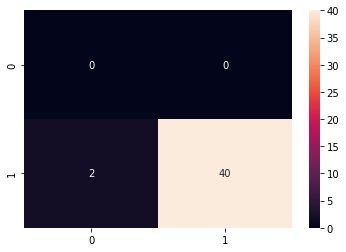

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_classes,y_previsoes)
sns.heatmap(cm, annot= True);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_classes, y_previsoes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        42

    accuracy                           0.95        42
   macro avg       0.50      0.48      0.49        42
weighted avg       1.00      0.95      0.98        42



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##AUC curve For Binary Classification using matplotlib

https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python



In [ ]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [ ]:
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_classes,  y_previsoes)
auc = metrics.roc_auc_score(y_classes, y_previsoes)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


ValueError: ignored

## Nova tentativa
https://colab.research.google.com/github/gal-a/blog/blob/master/docs/notebooks/sklearn/sklearn_precision_recall_vs_roc_curves.ipynb#scrollTo=I4b1HAHx5lP-

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


nan


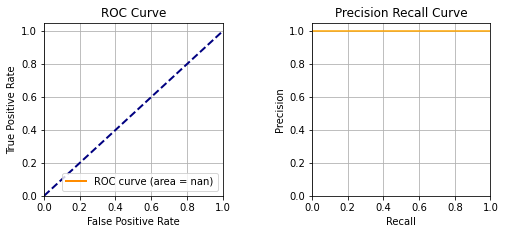

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# Get ROC curve FPR and TPR from true labels vs score values
fpr, tpr, _ = roc_curve(y_classes, y_previsoes)

# Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Calculate precision and recall from true labels vs score values
precision, recall, _ = precision_recall_curve(y_classes, y_previsoes)

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1,2,2)
plt.step(recall, precision, color='orange', where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.5   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

# Historico de tentativas

### Conda + Google colab v2


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
import sys
sys.path

In [ ]:
!conda info --envs

In [ ]:
!echo $PYTHONPATH

In [ ]:
! ls /usr/local

In [ ]:
!python --version

In [ ]:
!conda env create -f environment.yml 

In [ ]:
%%bash
conda activate vin_old_tf

In [ ]:
%%bash
source activate vin_old_tf

In [ ]:
!python --version

In [ ]:
%%bash
source activate vin_old_tf

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.7/site-packages')
print(sys.path)

print("Python version")
print(sys.version)


!conda update conda -y -q
!source /usr/local/etc/profile.d/conda.sh
!conda init 
!conda install -n root _license -y -q

In [ ]:
!conda activate vin_old_tf

In [ ]:
%%bash
source activate vin_old_tf

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.7/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

In [ ]:
!python --version

In [ ]:
import keras
keras.__version__

In [ ]:
import tensorflow
tensorflow.__version__

In [ ]:
import cv2
cv2.__version__

### Conda + Google cola

In [ ]:
import sys
sys.path

In [ ]:
!which python # should return /usr/local/bin/python

In [ ]:
!python --version

In [ ]:
!echo $PYTHONPATH

In [ ]:
% env PYTHONPATH =

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
!which conda # should return /usr/local/bin/conda

In [ ]:
!conda --version # should return 4.5.4

In [ ]:
!which python # still returns /usr/local/bin/python

In [ ]:
!python --version # now returns Python 3.6.5 :: Anaconda, Inc.

In [ ]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

In [ ]:
!conda --version # now returns 4.8.3

In [ ]:
!python --version # now returns Python 3.6.10 :: Anaconda, Inc.

In [ ]:
import sys
sys.path

In [ ]:
#mostra os pacotes instalados por padrao no google colab
#!ls /usr/local/lib/python3.6/dist-packages

!ls /usr/local/lib/python3.7/dist-packages

In [ ]:
#pacotes instalados pelo conda serão instalados na pasta: /usr/local/lib/python3.7/site-packages
#sys.path.append('/usr/local/lib/python3.7/site-packages')

import sys
_ = (sys.path
        .append("/usr/local/lib/python3.7/site-packages"))

In [ ]:
sys.path

In [ ]:
#instalando um pacote de exemplo com o conda para ver se ta funfando

!conda install --channel conda-forge featuretools --yes

In [ ]:
#verificar se os pacotes instalados pelo conda aparecem nessa pasta

#!ls /usr/local/lib/python3.7/site-packages

!ls /usr/local/lib/python3.7

In [ ]:
!echo $PYTHONPATH

In [ ]:
#export PYTHONPATH=${PYTHONPATH}:$/content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I

#### Intalação do env.yml

In [ ]:
#coloca nas configurações de ambiente usada no artigo
!conda env create -f environment.yml

In [ ]:
!conda info --envs

In [ ]:
!conda activate vin_old_tf

In [ ]:
!source activate vin_old_tf && conda env list

In [ ]:
%%bash
source activate vin_old_tf

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.7/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

In [ ]:
!conda update conda -y -q
!source /usr/local/etc/profile.d/conda.sh
!conda init 
!conda install -n root _license -y -q

In [ ]:
%%bash
source activate vin_old_tf

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.7/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

In [ ]:
%%bash
source activate vin_old_tf


In [ ]:
%%bash
$ conda activate vin_old_tf

In [ ]:
%%bash
source activate vin_old_tf

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.6/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

import keras
keras.__version__

import tensorflow
tensorflow.__version__

import cv2
cv2.__version__

In [ ]:
!echo $PYTHONPATH

In [ ]:
!python --version

In [ ]:
import cv2
cv2.__version__

In [ ]:
import keras
keras.__version__

In [ ]:
import tensorflow
tensorflow.__version__

### Conda + Google colab v3


In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh

!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh

!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

In [ ]:
%%bash
source activate myenv

python
import sys
# some simple python commands
sys.path.append('/usr/local/lib/python3.6/site-packages')
print(sys.path)

print("Python version")
print(sys.version)

In [ ]:
!conda update conda -y -q
!source /usr/local/etc/profile.d/conda.sh
!conda init 
!conda install -n root _license -y -q

### Baixar aquivo do google drive 

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1uGEunGHHfwPrLF7MiL_bpRn3XLzmHy6a'
#teste file_id = '14EVIGfuyOzdrvFiQcQp2dlGQ8vJ-OPS2'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [ ]:

file_id = '1uGEunGHHfwPrLF7MiL_bpRn3XLzmHy6a'

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))

##### How to Import and Export Datasets in Google Colab

https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971

In [ ]:
from google.colab import files
files.download('adc.json')

##### copy file from google drive to colab work diretory

https://www.maketecheasier.com/copy-paste-files-linux-command-line/#:~:text=If%20you%20just%20want%20to,shortcut%20Ctrl%20%2B%20Shift%20%2B%20V%20.

https://stackoverflow.com/questions/55384621/how-do-i-load-only-a-specific-folder-on-google-colab



In [ ]:
#!cd /content/drive/MyDrive/Colab Notebooks/Motion and Region A A L F D  T I/environment.yml
#cd entra na pasta #ls mostra o que tem dentro da pasta #pwd mostra qual é a pasta de trabalho atual

%%bash
ls
cd /content/drive/MyDrive/Colab\ Notebooks/Motion\ and\ Region\ A\ A\ L\ F\ D\ \ T\ I/
#ls /content/drive/MyDrive/
ls
pwd
cp environment.yml /content/

## Tentativas OpenPose

### Pose Estimation




In [ ]:
import os
from os.path import exists, join, basename, splitext
# initiating variable for cloning openpose
git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

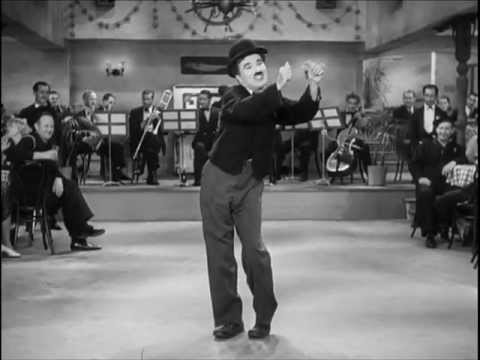

In [ ]:
YOUTUBE_ID = '0daS_SDCT_U'
YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

In [ ]:
import io
import base64
from IPython.display import HTML
file_name='output.mp4'
width=640
height=480
video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

FileNotFoundError: ignored

### OpenPose 2

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

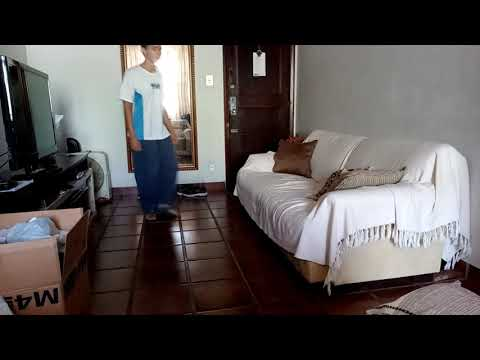

In [ ]:
#YOUTUBE_ID = 'RXABo9hm8B8'

#YouTubeVideo(YOUTUBE_ID)

YOUTUBE_ID = 'IRLdRm7heGg'
#https://youtu.be/IRLdRm7heGg
YouTubeVideo(YOUTUBE_ID)


In [ ]:
#!rm -rf youtube.mp4
# download the youtube with the given ID
#!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
#!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --disable_blending --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

[libprotobuf FATAL ../3rdparty/protobuf/src/google/protobuf/stubs/common.cc:68] This program requires version 3.11.0 of the Protocol Buffer runtime library, but the installed version is 3.5.1.  Please update your library.  If you compiled the program yourself, make sure that your headers are from the same version of Protocol Buffers as your link-time library.  (Version verification failed in "google/protobuf/any.pb.cc".)
terminate called after throwing an instance of 'google::protobuf::FatalException'
  what():  This program requires version 3.11.0 of the Protocol Buffer runtime library, but the installed version is 3.5.1.  Please update your library.  If you compiled the program yourself, make sure that your headers are from the same version of Protocol Buffers as your link-time library.  (Version verification failed in "google/protobuf/any.pb.cc".)
ffmpeg version 4.1.3 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

FileNotFoundError: ignored

# To extract Google Drive zip from a Google colab notebook


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/ROSE Dataset/ActionRecognition/NTU RGB+D - RGB Videos/nturgbd_ir_s001.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
!ls

drive  sample_data


In [ ]:
#mover a pasta estraida para a nuvem
%%bash
cd ..
ls
mv tmp /content/drive/MyDrive/Colab\ Notebooks/ROSE\ Dataset/ActionRecognition/NTU\ RGB+D\ -\ RGB\ Videos

bin
boot
content
datalab
dev
etc
home
lib
lib32
lib64
media
mnt
opt
proc
python-apt
root
run
sbin
srv
sys
tensorflow-1.15.2
tmp
tools
usr
var


mv: cannot create fifo '/content/drive/MyDrive/Colab Notebooks/ROSE Dataset/ActionRecognition/NTU RGB+D - RGB Videos/tmp/tmpm9rglfm1/drive.fifo': Function not implemented
mv: cannot create special file '/content/drive/MyDrive/Colab Notebooks/ROSE Dataset/ActionRecognition/NTU RGB+D - RGB Videos/tmp/drivefs_ipc.0': Function not implemented
mv: cannot create special file '/content/drive/MyDrive/Colab Notebooks/ROSE Dataset/ActionRecognition/NTU RGB+D - RGB Videos/tmp/drivefs_ipc.0_shell': Function not implemented
mv: cannot create special file '/content/drive/MyDrive/Colab Notebooks/ROSE Dataset/ActionRecognition/NTU RGB+D - RGB Videos/tmp/debugger_2ijjjd43w6': Function not implemented


# New Person Detection and Tracking

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
!pip install opencv-python==3.4.4.19
!pip install opencv-contrib-python==3.4.4.19

     |████████████████████████████████| 25.4 MB 73.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 31.0 MB 59.0 MB/s 


In [ ]:
import cv2
print(cv2.__version__)
#nativo do colab 4.1.2

4.1.2


In [ ]:
import cv2

detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Udemy/Rastreamento-objetos-python-opencv/Rastreamento_OpenCV.zip (Unzipped Files)/Rastreamento_OpenCV/cascade/fullbody.xml')

cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/Udemy/Rastreamento-objetos-python-opencv/Rastreamento_OpenCV.zip (Unzipped Files)/Rastreamento_OpenCV/videos/walking.avi")

ok, frame = cap.read()
if not ok:
    print('Não é possível ler o arquivo de vídeo')
    sys.exit(1)

#frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
detections = detector.detectMultiScale(frame)

print(detections)
print(len(detections))

for (x, y, l, a) in detections:
    cv2.rectangle(frame, (x, y), (x + l, y + a), (0,255,0), 2)

#cv2_imshow(image)
#cv2.imwrite('/content/image6.jpg', frame)


[[492 147  43  87]
 [235 198  61 123]]
2


In [ ]:
#import cv2
import sys
from random import randint

tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD', 'MEDIANFLOW', 'MOSSE', 'CSRT']

def createTrackerByName(trackerType):
    if trackerType == tracker_types[0]:
        tracker = cv2.TrackerBoosting_create()
    elif trackerType == tracker_types[1]:
        tracker = cv2.TrackerMIL_create()
    elif trackerType == tracker_types[2]:
        tracker = cv2.TrackerKCF_create()
    elif trackerType == tracker_types[3]:
        tracker = cv2.TrackerTLD_create()
    elif trackerType == tracker_types[4]:
        tracker = cv2.TrackerMedianFlow_create()
    elif trackerType == tracker_types[5]:
        tracker = cv2.TrackerMOSSE_create()
    elif trackerType == tracker_types[6]:
        tracker = cv2.TrackerCSRT_create()
    else:
        tracker = None
        print('Nome incorreto')
        print('Os rastreadores disponíveis são: ')
        for t in tracker_types:
            print(t)

    return tracker

#print(createTrackerByName('CSRT'))
#print(createTrackerByName('CSRT9'))


#bboxes = []
colors = []

trackertype = 'CSRT'
multiTracker = cv2.MultiTracker_create()

for person in detections:
    multiTracker.add(createTrackerByName(trackertype), frame, tuple(person))
    colors.append((randint(0, 255), randint(0,255), randint(0,255)))
    

print('Caixas delimitadoras selecionadas {}'.format(detections))
print('Cores {}'.format(colors))    

def main(i):
  while cap.isOpened():
      ok, frame = cap.read()
      if not ok:
          break
      
      i+=1
      ok, boxes = multiTracker.update(frame)

      for j, newbox in enumerate(boxes):
          (x, y, w, h) = [int(v) for v in newbox]
          cv2.rectangle(frame, (x, y), (x + w, y + h), colors[j], 2, 1)

      i = str(i).zfill(4)
      #salva o frame no meu google drive
      cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Allan Fall/New Person Detection and Tracking/frame-'+ i +'.jpg', frame)
      i = int(i)

main(0)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


Caixas delimitadoras selecionadas [[492 147  43  87]
 [235 198  61 123]]
Cores [(212, 144, 3), (1, 29, 215)]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250

# Contornos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import sys
from google.colab.patches import cv2_imshow

TEXT_COLOR = (0, 255, 0)
TRACKER_COLOR = (255, 255, 255)
FONT = cv2.FONT_HERSHEY_SIMPLEX
#VIDEO_SOURCE = "/content/drive/MyDrive/Colab Notebooks/Allan Fall/Resultados Openpose/TENTE NÃO RIR _ MELHORES TOMBOS DE BÊBADO-openpose.mp4"
VIDEO_SOURCE = "/content/drive/MyDrive/Colab Notebooks/ROSE Dataset/ActionRecognition/NTU RGB+D - RGB Videos/Cópia de S001C003P008R002A043_ir.avi"
BGS_TYPES = ["GMG", "MOG", "MOG2", "KNN", "CNT"]
BGS_TYPE = BGS_TYPES[4]

def getKernel(KERNEL_TYPE):
    if KERNEL_TYPE == "dilation":
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    if KERNEL_TYPE == "opening":
        kernel = np.ones((3, 3), np.uint8)
    if KERNEL_TYPE == "closing":
        kernel = np.ones((3, 3), np.uint8)

    return kernel

def getFilter(img, filter):
    if filter == 'closing':
        return cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel("closing"), iterations=2)

    if filter == 'opening':
        return cv2.morphologyEx(img, cv2.MORPH_OPEN, getKernel("opening"), iterations=2)

    if filter == 'dilation':
        return cv2.dilate(img, getKernel("dilation"), iterations=2)

    if filter == 'combine':
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel("closing"), iterations=2)
        opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, getKernel("opening"), iterations=2)
        dilation = cv2.dilate(opening, getKernel("dilation"), iterations=2)

        return dilation

def getBGSubtractor(BGS_TYPE):
    if BGS_TYPE == "GMG":
        return cv2.bgsegm.createBackgroundSubtractorGMG()
    if BGS_TYPE == "MOG":
        return cv2.bgsegm.createBackgroundSubtractorMOG()
    if BGS_TYPE == "MOG2":
        return cv2.createBackgroundSubtractorMOG2()
    if BGS_TYPE == "KNN":
        return cv2.createBackgroundSubtractorKNN()
    if BGS_TYPE == "CNT":
        return cv2.bgsegm.createBackgroundSubtractorCNT(minPixelStability=1, useHistory=True, maxPixelStability=1*60, isParallel=True)
    print("Detector invÃ¡lido")
    sys.exit(1)

cap = cv2.VideoCapture(VIDEO_SOURCE)
minArea = 500
maxArea= 15000
bg_subtractor = getBGSubtractor(BGS_TYPE)

def main(i):
    while (cap.isOpened):

        ok, frame = cap.read()
        if not ok:
            print("Erro")
            break
        i+=1

        #frame = cv2.resize(frame, (0, 0), fx=0.50, fy=0.50)
        frame = cv2.resize(frame, (640, 480))

        #bg_mask = bg_subtractor.apply(frame)
        #bg_mask = getFilter(bg_mask, 'combine')
        #bg_mask = cv2.medianBlur(bg_mask, 5)

        #(contours, hierarchy) = cv2.findContours(bg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #(contours, hierarchy) = cv2.findContours(bg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        
        #print(contours)

        #for cnt in contours:
        #    area = cv2.contourArea(cnt)
        #    if area >= minArea and area <=maxArea:
        #        x, y, w, h = cv2.boundingRect(cnt)
                #cv2.rectangle(frame, (10,30), (250,55), (255,0,0), -1)
                #cv2.putText(frame, 'Movimento detectado!', (10,50), FONT, 0.8, TEXT_COLOR, 2, cv2.LINE_AA)

                #cv2.drawContours(frame, cnt, -1, TRACKER_COLOR, 3)
                #cv2.drawContours(frame, cnt, -1, (255,255,255), 1)
                #cv2.rectangle(frame, (x, y), (x+w, y+h), TRACKER_COLOR, 3)
                #cv2.rectangle(frame, (x, y), (x + w, y + h), (255,255,255), 1)

                # SobreposiÃ§Ãµes transparentes
                # https://www.pyimagesearch.com/2016/03/07/transparent-overlays-with-opencv/
         #       for alpha in np.arange(0.8, 1.1, 0.9)[::-1]:
         #           frame_copy = frame.copy()
         #           output = frame.copy()
         #           cv2.drawContours(frame_copy, [cnt], -1, TRACKER_COLOR, 20)
         #           frame = cv2.addWeighted(frame_copy, alpha, output, 1 - alpha, 0, output)

        #result = cv2.bitwise_and(frame, frame, mask=bg_mask)
        #cv2.imshow('Frame', frame)
        #cv2.imshow('Mask', result)
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #cv2_imshow(frame)

        i = str(i).zfill(4)
        #salva o frame no meu google drive
        cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/Allan Fall/Fall36/FALL_36-'+ i +'.jpg', frame)
        #cv2.imwrite('/content/FALL_37-'+ i +'.jpg', frame)
        i = int(i)
        


        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

main(0)


Erro


# New Person Detection and Tracking (teste 1)

## New Person Detection (teste 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip uninstall opencv-python
#!pip uninstall opencv-contrib-python

In [ ]:
#!pip install opencv-python==3.4.4.19
#!pip install opencv-contrib-python==3.4.4.19

In [ ]:
import cv2
print(cv2.__version__)
#nativo do colab 4.1.2

4.1.2


In [ ]:
import cv2

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Udemy/Rastreamento-objetos-python-opencv/Rastreamento_OpenCV.zip (Unzipped Files)/Rastreamento_OpenCV/imagens/pessoas.jpg')

detector = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Udemy/Rastreamento-objetos-python-opencv/Rastreamento_OpenCV.zip (Unzipped Files)/Rastreamento_OpenCV/cascade/fullbody.xml')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("Pessoas", image_gray)

detections = detector.detectMultiScale(image_gray)

#print(detections)
print(len(detections))

for (x, y, l, a) in detections:
    cv2.rectangle(image, (x, y), (x + l, y + a), (0,255,0), 2)

#cv2_imshow(image)
cv2.imwrite('/content/image.jpg', image)
    

#cv2.waitKey(0)
#cv2.destroyAllWindows()

9


True

## New Person tracking (teste 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip uninstall opencv-contrib-python

Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
!pip install opencv-python==3.4.4.19
!pip install opencv-contrib-python==3.4.4.19

     |████████████████████████████████| 25.4 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 31.0 MB 1.4 MB/s 


In [ ]:
import cv2
print(cv2.__version__)
#nativo do colab 4.1.2

3.4.4


In [ ]:
import cv2
import sys
from random import randint

tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD', 'MEDIANFLOW', 'MOSSE', 'CSRT']

def createTrackerByName(trackerType):
    if trackerType == tracker_types[0]:
        tracker = cv2.TrackerBoosting_create()
    elif trackerType == tracker_types[1]:
        tracker = cv2.TrackerMIL_create()
    elif trackerType == tracker_types[2]:
        tracker = cv2.TrackerKCF_create()
    elif trackerType == tracker_types[3]:
        tracker = cv2.TrackerTLD_create()
    elif trackerType == tracker_types[4]:
        tracker = cv2.TrackerMedianFlow_create()
    elif trackerType == tracker_types[5]:
        tracker = cv2.TrackerMOSSE_create()
    elif trackerType == tracker_types[6]:
        tracker = cv2.TrackerCSRT_create()
    else:
        tracker = None
        print('Nome incorreto')
        print('Os rastreadores disponíveis são: ')
        for t in tracker_types:
            print(t)

    return tracker

#print(createTrackerByName('CSRT'))
#print(createTrackerByName('CSRT9'))

cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/Udemy/Rastreamento-objetos-python-opencv/Rastreamento_OpenCV.zip (Unzipped Files)/Rastreamento_OpenCV/videos/race.mp4")

ok, frame = cap.read()
if not ok:
    print('Não é possível ler o arquivo de vídeo')
    sys.exit(1)

bboxes = []
colors = []

while True:
    bbox = cv2.selectROI('MultiTracker', frame)
    bboxes.append(bbox)
    colors.append((randint(0, 255), randint(0,255), randint(0,255)))
    print('Pressione Q para sair das caixas de seleção e começar a rastrear')
    print('Pressione qualquer outra tecla para selecionar o próximo objeto')
    k = cv2.waitKey(0) & 0XFF
    if (k == 113):
        break

print('Caixas delimitadoras selecionadas {}'.format(bboxes))
print('Cores {}'.format(colors))

trackertype = 'CSRT'
multiTracker = cv2.MultiTracker_create()

for bbox in bboxes:
    multiTracker.add(createTrackerByName(trackertype), frame, bbox)

while cap.isOpened():
    ok, frame = cap.read()
    if not ok:
        break

    ok, boxes = multiTracker.update(frame)

    for i, newbox in enumerate(boxes):
        (x, y, w, h) = [int(v) for v in newbox]
        cv2.rectangle(frame, (x, y), (x + w, y + h), colors[i], 2, 1)

    cv2.imshow('MultiTracker', frame)

    if cv2.waitKey(1) & 0XFF == 27:
        break
